# section3_project
## 주제: 프로야구선수(타자)들의 성적을 활용하여 연봉 예측

### 이번 프로젝트는 “데이터 파이프라인 구축” 이라는 업무를 담당하고, 진행하는 과정을 시뮬레이션해보는 것을 목표로 합니다.

- 기능개발 목표는 API 서비스 개발 1개, 데이터 분석 그래프 3개 입니다.
- 이번 프로젝트의 목표는 전체 과정을 개인이 구성하는 것을 1차 목표로하시기 바랍니다.
- 어렵거나 시간이 걸리는 작업은 최대한 우회하시길 바랍니다.
- 1~4 까지의 배점은 0.5 점입니다.
- Advanced 는 기준 당 0.5 점입니다. 부여되는 점수는 최대 3점입니다.

In [ ]:
!pip install selenium 
# 동적 웹페이지를 크롤링하기 위한 라이브러리 
!pip install beautifulsoup4 
# 정적 웹페이지를 크롤링을 할 수 있는 라이브러리 

In [2]:
from selenium import webdriver 
from bs4 import BeautifulSoup 
import pandas as pd 

chrome_options = webdriver.ChromeOptions() 
chrome_options.add_argument('--headless') #내부 창을 띄울 수 없으므로 설정 
chrome_options.add_argument('--no-sandbox') 
chrome_options.add_argument('--disable-dev-shm-usage') 
chromeDriver = webdriver.Chrome('C:/users/Yong/chromedriver.exe',chrome_options=chrome_options)

C:\Users\Yong\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: use options instead of chrome_options
  if __name__ == '__main__':


In [3]:
url = "http://www.statiz.co.kr/stat.php?opt=0&sopt=0&re=0&ys=2011&ye=2021&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=WAR_ALL_ADJ&o2=TPA&de=1&lr=0&tr=&cv=&ml=1&sn=4000&si=&cn="
chromeDriver.get(url) #사용할 URL 

html = chromeDriver.page_source 
bsObject = BeautifulSoup(html, 'html.parser')

In [4]:
temp = bsObject.find_all("table")[1]

In [5]:
column=['순','이름','팀','WAR','G','타석','타수','득점','안타','2타','3타','홈런','루타','타점','도루','도실','볼넷','사구','고4','삼진','병살','희타','희비','타율','출루','장타','OPS','wOBA','wRC+','WAR']
df = pd.DataFrame(columns=column)
temp_len = len(temp.find_all("tr"))

for i in range(2,temp_len):
    tempTr = temp.find_all("tr")[i]
    if(tempTr.find("th") is not None):
        continue
    row={}
    column_index =0
    for j in range(30):
        tempTd= tempTr.find_all("td")[j].text
        row[column[column_index]]=tempTd
        column_index+=1
        
    df = df.append(row,ignore_index=True)

In [6]:
df

,순,이름,팀,WAR,G,타석,타수,득점,안타,2타,...,병살,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,WAR
0,1,테임즈,15N1B,10.71,142,595,472,130,180,42,...,7,0,7,.381,.498,.790,1.288,.530,222.3,10.71
1,2,강정호,12넥SS,8.23,124,519,436,77,137,32,...,16,1,5,.314,.413,.560,.973,.438,179.8,8.23
2,3,강정호,14넥SS,8.05,117,501,418,103,149,36,...,8,0,2,.356,.459,.739,1.198,.500,185.6,8.05
3,4,박석민,12삼3B,7.89,127,549,443,79,138,19,...,8,2,5,.312,.433,.524,.957,.438,179.9,7.89
4,5,박병호,15넥1B,7.76,140,622,528,129,181,35,...,10,0,4,.343,.436,.714,1.150,.481,181.9,7.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3668,3669,정범모,15한C,-1.25,51,114,96,3,13,2,...,0,7,1,.135,.215,.156,.371,.177,-16.3,-1.25
3669,3670,조인성,16한C,-1.36,76,146,137,10,23,2,...,2,6,0,.168,.186,.248,.434,.188,-12.4,-1.36
3670,3671,강한울,15KSS,-1.39,90,292,264,30,54,8,...,2,12,0,.205,.250,.258,.508,.229,18.5,-1.39
3671,3672,나종덕,19롯C,-1.41,104,209,185,12,23,4,...,5,7,2,.124,.188,.195,.383,.180,-4.2,-1.41


In [7]:
column_sal = ["선수","연도","팀","연봉(만원)","WAR"]
df_salary = pd.DataFrame(columns=column_sal)

for x in range(11,22):
    for y in range(1,11):
        url_salary= f"http://www.statiz.co.kr/salary.php?opt=0&sopt=20{x}&cnv=&pos=&te={y}"

        chromeDriver.get(url_salary) #사용할 URL 

        html_sal = chromeDriver.page_source 
        bsObject_sal = BeautifulSoup(html_sal, 'html.parser')
        temp_sal = bsObject_sal.find_all("table")[1]
        temp_sal_len = len(temp_sal.find_all("tr"))

        row_sal={}

        for i in range(2,temp_sal_len):
            temp_sal_Tr = temp_sal.find_all("tr")[i]
            column_sal_index =0

            for j in range(4):
                temp_sal_Td= temp_sal_Tr.find_all("td")[j].text
                row_sal[column_sal[column_sal_index]]=temp_sal_Td
                column_sal_index+=1

            df_salary = df_salary.append(row_sal,ignore_index=True)

In [8]:
df_salary

,선수,연도,팀,연봉(만원),WAR
0,최희섭,2011,KIA,"40,000",NaN
1,이범호,2011,KIA,"40,000",NaN
2,서재응,2011,KIA,"33,000",NaN
3,김상훈,2011,KIA,"32,500",NaN
4,이용규,2011,KIA,"20,000",NaN
...,...,...,...,...,...
6403,최태성,2021,kt,"2,700",NaN
6404,윤종휘,2021,kt,"2,700",NaN
6405,김성균,2021,kt,"2,700",NaN
6406,문상준,2021,kt,"2,700",NaN


In [9]:
df_salary.drop("WAR",axis=1,inplace =True)

In [10]:
for x in range(len(df_salary)):
    df_salary['연봉(만원)'][x] = df_salary['연봉(만원)'][x].replace(",","")
    df_salary['연도'][x] = df_salary['연도'][x][2:]  

In [11]:
df_salary['연봉(만원)'] = df_salary['연봉(만원)'].apply(pd.to_numeric)
df_salary['선수_'] = df_salary['선수'] + df_salary['연도']

In [12]:
df_sal = df_salary[['선수_','연봉(만원)']]
df_sal

,선수_,연봉(만원)
0,최희섭11,40000
1,이범호11,40000
2,서재응11,33000
3,김상훈11,32500
4,이용규11,20000
...,...,...
6403,최태성21,2700
6404,윤종휘21,2700
6405,김성균21,2700
6406,문상준21,2700


In [13]:
df1 =df.copy()

In [14]:
df1['연도'] = df1.팀.str[:2]
df1['팀'] = df1.팀.str[2]
df1['포지션'] = df1.팀.str[4:]

In [15]:
df1['선수_'] = df1['이름'] + df1['연도']
df1

,순,이름,팀,WAR,G,타석,타수,득점,안타,2타,...,타율,출루,장타,OPS,wOBA,wRC+,WAR,연도,포지션,선수_
0,1,테임즈,N,10.71,142,595,472,130,180,42,...,.381,.498,.790,1.288,.530,222.3,10.71,15,,테임즈15
1,2,강정호,넥,8.23,124,519,436,77,137,32,...,.314,.413,.560,.973,.438,179.8,8.23,12,,강정호12
2,3,강정호,넥,8.05,117,501,418,103,149,36,...,.356,.459,.739,1.198,.500,185.6,8.05,14,,강정호14
3,4,박석민,삼,7.89,127,549,443,79,138,19,...,.312,.433,.524,.957,.438,179.9,7.89,12,,박석민12
4,5,박병호,넥,7.76,140,622,528,129,181,35,...,.343,.436,.714,1.150,.481,181.9,7.76,15,,박병호15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3668,3669,정범모,한,-1.25,51,114,96,3,13,2,...,.135,.215,.156,.371,.177,-16.3,-1.25,15,,정범모15
3669,3670,조인성,한,-1.36,76,146,137,10,23,2,...,.168,.186,.248,.434,.188,-12.4,-1.36,16,,조인성16
3670,3671,강한울,K,-1.39,90,292,264,30,54,8,...,.205,.250,.258,.508,.229,18.5,-1.39,15,,강한울15
3671,3672,나종덕,롯,-1.41,104,209,185,12,23,4,...,.124,.188,.195,.383,.180,-4.2,-1.41,19,,나종덕19


In [16]:
df3 = pd.merge(df1, df_sal, on='선수_', how ='inner')      # 선수,연도로 교집합(join)
df3

,순,이름,팀,WAR,G,타석,타수,득점,안타,2타,...,출루,장타,OPS,wOBA,wRC+,WAR,연도,포지션,선수_,연봉(만원)
0,1,테임즈,N,10.71,142,595,472,130,180,42,...,.498,.790,1.288,.530,222.3,10.71,15,,테임즈15,125000
1,2,강정호,넥,8.23,124,519,436,77,137,32,...,.413,.560,.973,.438,179.8,8.23,12,,강정호12,18000
2,3,강정호,넥,8.05,117,501,418,103,149,36,...,.459,.739,1.198,.500,185.6,8.05,14,,강정호14,900000
3,4,박석민,삼,7.89,127,549,443,79,138,19,...,.433,.524,.957,.438,179.9,7.89,12,,박석민12,18000
4,5,박병호,넥,7.76,140,622,528,129,181,35,...,.436,.714,1.150,.481,181.9,7.76,15,,박병호15,70000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,3668,박종윤,롯,-1.23,98,326,314,29,80,11,...,.277,.347,.624,.279,54.0,-1.23,15,,박종윤15,16000
3249,3669,정범모,한,-1.25,51,114,96,3,13,2,...,.215,.156,.371,.177,-16.3,-1.25,15,,정범모15,6000
3250,3670,조인성,한,-1.36,76,146,137,10,23,2,...,.186,.248,.434,.188,-12.4,-1.36,16,,조인성16,40000
3251,3671,강한울,K,-1.39,90,292,264,30,54,8,...,.250,.258,.508,.229,18.5,-1.39,15,,강한울15,6000


In [17]:
df3.rename(columns={"연봉(만원)":"연봉_만원"}, inplace =True)

In [18]:
df3 = df3[df3.연봉_만원 <100000]     # 이상치 (연봉) 제거

In [19]:
df3

,순,이름,팀,WAR,G,타석,타수,득점,안타,2타,...,출루,장타,OPS,wOBA,wRC+,WAR,연도,포지션,선수_,연봉_만원
1,2,강정호,넥,8.23,124,519,436,77,137,32,...,.413,.560,.973,.438,179.8,8.23,12,,강정호12,18000
3,4,박석민,삼,7.89,127,549,443,79,138,19,...,.433,.524,.957,.438,179.9,7.89,12,,박석민12,18000
4,5,박병호,넥,7.76,140,622,528,129,181,35,...,.436,.714,1.150,.481,181.9,7.76,15,,박병호15,70000
5,6,최형우,삼,7.75,138,618,519,99,195,46,...,.464,.651,1.116,.480,177.8,7.75,16,,최형우16,70000
6,7,최형우,삼,7.64,133,571,480,80,163,37,...,.427,.617,1.044,.457,182.2,7.64,11,,최형우11,18500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,3668,박종윤,롯,-1.23,98,326,314,29,80,11,...,.277,.347,.624,.279,54.0,-1.23,15,,박종윤15,16000
3249,3669,정범모,한,-1.25,51,114,96,3,13,2,...,.215,.156,.371,.177,-16.3,-1.25,15,,정범모15,6000
3250,3670,조인성,한,-1.36,76,146,137,10,23,2,...,.186,.248,.434,.188,-12.4,-1.36,16,,조인성16,40000
3251,3671,강한울,K,-1.39,90,292,264,30,54,8,...,.250,.258,.508,.229,18.5,-1.39,15,,강한울15,6000


In [20]:
df3.isnull().sum()                # 결측치 제거

순        0
이름       0
팀        0
WAR      0
G        0
타석       0
타수       0
득점       0
안타       0
2타       0
3타       0
홈런       0
루타       0
타점       0
도루       0
도실       0
볼넷       0
사구       0
고4       0
삼진       0
병살       0
희타       0
희비       0
타율       0
출루       0
장타       0
OPS      0
wOBA     0
wRC+     0
WAR      0
연도       0
포지션      0
선수_      0
연봉_만원    0
dtype: int64

In [21]:
df3.drop_duplicates(inplace=True)       # 중복값 제거
df3

C:\Users\Yong\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,순,이름,팀,WAR,G,타석,타수,득점,안타,2타,...,출루,장타,OPS,wOBA,wRC+,WAR,연도,포지션,선수_,연봉_만원
1,2,강정호,넥,8.23,124,519,436,77,137,32,...,.413,.560,.973,.438,179.8,8.23,12,,강정호12,18000
3,4,박석민,삼,7.89,127,549,443,79,138,19,...,.433,.524,.957,.438,179.9,7.89,12,,박석민12,18000
4,5,박병호,넥,7.76,140,622,528,129,181,35,...,.436,.714,1.150,.481,181.9,7.76,15,,박병호15,70000
5,6,최형우,삼,7.75,138,618,519,99,195,46,...,.464,.651,1.116,.480,177.8,7.75,16,,최형우16,70000
6,7,최형우,삼,7.64,133,571,480,80,163,37,...,.427,.617,1.044,.457,182.2,7.64,11,,최형우11,18500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,3668,박종윤,롯,-1.23,98,326,314,29,80,11,...,.277,.347,.624,.279,54.0,-1.23,15,,박종윤15,16000
3249,3669,정범모,한,-1.25,51,114,96,3,13,2,...,.215,.156,.371,.177,-16.3,-1.25,15,,정범모15,6000
3250,3670,조인성,한,-1.36,76,146,137,10,23,2,...,.186,.248,.434,.188,-12.4,-1.36,16,,조인성16,40000
3251,3671,강한울,K,-1.39,90,292,264,30,54,8,...,.250,.258,.508,.229,18.5,-1.39,15,,강한울15,6000


In [22]:
df3 = df3.loc[:,~df3.T.duplicated()]

In [23]:
df3

,순,이름,팀,WAR,G,타석,타수,득점,안타,2타,...,타율,출루,장타,OPS,wOBA,wRC+,연도,포지션,선수_,연봉_만원
1,2,강정호,넥,8.23,124,519,436,77,137,32,...,.314,.413,.560,.973,.438,179.8,12,,강정호12,18000
3,4,박석민,삼,7.89,127,549,443,79,138,19,...,.312,.433,.524,.957,.438,179.9,12,,박석민12,18000
4,5,박병호,넥,7.76,140,622,528,129,181,35,...,.343,.436,.714,1.150,.481,181.9,15,,박병호15,70000
5,6,최형우,삼,7.75,138,618,519,99,195,46,...,.376,.464,.651,1.116,.480,177.8,16,,최형우16,70000
6,7,최형우,삼,7.64,133,571,480,80,163,37,...,.340,.427,.617,1.044,.457,182.2,11,,최형우11,18500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,3668,박종윤,롯,-1.23,98,326,314,29,80,11,...,.255,.277,.347,.624,.279,54.0,15,,박종윤15,16000
3249,3669,정범모,한,-1.25,51,114,96,3,13,2,...,.135,.215,.156,.371,.177,-16.3,15,,정범모15,6000
3250,3670,조인성,한,-1.36,76,146,137,10,23,2,...,.168,.186,.248,.434,.188,-12.4,16,,조인성16,40000
3251,3671,강한울,K,-1.39,90,292,264,30,54,8,...,.205,.250,.258,.508,.229,18.5,15,,강한울15,6000


In [24]:
df3.drop(['순','선수_'], axis=1, inplace=True)

C:\Users\Yong\anaconda3\lib\site-packages\pandas\core\frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
df3['장타'] = df3['2타'].apply(pd.to_numeric) + df3['3타'].apply(pd.to_numeric)

C:\Users\Yong\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
df3.drop(['2타','3타'], axis=1, inplace=True)

In [27]:
df3

,이름,팀,WAR,G,타석,타수,득점,안타,홈런,루타,...,희비,타율,출루,장타,OPS,wOBA,wRC+,연도,포지션,연봉_만원
1,강정호,넥,8.23,124,519,436,77,137,25,244,...,5,.314,.413,32,.973,.438,179.8,12,,18000
3,박석민,삼,7.89,127,549,443,79,138,23,232,...,5,.312,.433,22,.957,.438,179.9,12,,18000
4,박병호,넥,7.76,140,622,528,129,181,53,377,...,4,.343,.436,36,1.150,.481,181.9,15,,70000
5,최형우,삼,7.75,138,618,519,99,195,31,338,...,7,.376,.464,48,1.116,.480,177.8,16,,70000
6,최형우,삼,7.64,133,571,480,80,163,30,296,...,10,.340,.427,40,1.044,.457,182.2,11,,18500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,박종윤,롯,-1.23,98,326,314,29,80,4,109,...,1,.255,.277,14,.624,.279,54.0,15,,16000
3249,정범모,한,-1.25,51,114,96,3,13,0,15,...,1,.135,.215,2,.371,.177,-16.3,15,,6000
3250,조인성,한,-1.36,76,146,137,10,23,3,34,...,0,.168,.186,2,.434,.188,-12.4,16,,40000
3251,강한울,K,-1.39,90,292,264,30,54,0,68,...,0,.205,.250,11,.508,.229,18.5,15,,6000


In [28]:
df4= df3.copy()
df4.drop(['팀'], axis=1, inplace=True)

In [29]:
df4.drop(['포지션'], axis=1, inplace=True)
df4

,이름,WAR,G,타석,타수,득점,안타,홈런,루타,타점,...,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,연도,연봉_만원
1,강정호,8.23,124,519,436,77,137,25,244,82,...,1,5,.314,.413,32,.973,.438,179.8,12,18000
3,박석민,7.89,127,549,443,79,138,23,232,91,...,2,5,.312,.433,22,.957,.438,179.9,12,18000
4,박병호,7.76,140,622,528,129,181,53,377,146,...,0,4,.343,.436,36,1.150,.481,181.9,15,70000
5,최형우,7.75,138,618,519,99,195,31,338,144,...,0,7,.376,.464,48,1.116,.480,177.8,16,70000
6,최형우,7.64,133,571,480,80,163,30,296,118,...,0,10,.340,.427,40,1.044,.457,182.2,11,18500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3248,박종윤,-1.23,98,326,314,29,80,4,109,28,...,1,1,.255,.277,14,.624,.279,54.0,15,16000
3249,정범모,-1.25,51,114,96,3,13,0,15,10,...,7,1,.135,.215,2,.371,.177,-16.3,15,6000
3250,조인성,-1.36,76,146,137,10,23,3,34,7,...,6,0,.168,.186,2,.434,.188,-12.4,16,40000
3251,강한울,-1.39,90,292,264,30,54,0,68,12,...,12,0,.205,.250,11,.508,.229,18.5,15,6000


In [30]:
df4_records = df4.to_dict('records')
df4_records

[{'이름': '강정호',
  'WAR': ' 8.23 ',
  'G': ' 124 ',
  '타석': ' 519 ',
  '타수': ' 436 ',
  '득점': ' 77 ',
  '안타': ' 137 ',
  '홈런': ' 25 ',
  '루타': ' 244 ',
  '타점': ' 82 ',
  '도루': ' 21 ',
  '도실': ' 5 ',
  '볼넷': ' 71 ',
  '사구': ' 6 ',
  '고4': ' 8 ',
  '삼진': ' 78 ',
  '병살': ' 16 ',
  '희타': ' 1 ',
  '희비': ' 5 ',
  '타율': ' .314 ',
  '출루': ' .413 ',
  '장타': 32,
  'OPS': ' .973 ',
  'wOBA': ' .438 ',
  'wRC+': ' 179.8 ',
  '연도': '12',
  '연봉_만원': 18000},
 {'이름': '박석민',
  'WAR': ' 7.89 ',
  'G': ' 127 ',
  '타석': ' 549 ',
  '타수': ' 443 ',
  '득점': ' 79 ',
  '안타': ' 138 ',
  '홈런': ' 23 ',
  '루타': ' 232 ',
  '타점': ' 91 ',
  '도루': ' 2 ',
  '도실': ' 3 ',
  '볼넷': ' 72 ',
  '사구': ' 27 ',
  '고4': ' 5 ',
  '삼진': ' 83 ',
  '병살': ' 8 ',
  '희타': ' 2 ',
  '희비': ' 5 ',
  '타율': ' .312 ',
  '출루': ' .433 ',
  '장타': 22,
  'OPS': ' .957 ',
  'wOBA': ' .438 ',
  'wRC+': ' 179.9 ',
  '연도': '12',
  '연봉_만원': 18000},
 {'이름': '박병호',
  'WAR': ' 7.76 ',
  'G': ' 140 ',
  '타석': ' 622 ',
  '타수': ' 528 ',
  '득점': ' 129 ',
  '안타': 

In [31]:
pip install certifi

Note: you may need to restart the kernel to use updated packages.


# Mongo dB연결

In [32]:
# 가상환경에 pymongo dnspython설치하기
from pymongo import MongoClient
import certifi

HOST = 'cluster0.xn7k0.mongodb.net'
USER = 'yoyong'
PASSWORD = 'qwe123'
DATABASE_NAME = 'myFirstDatabase'
COLLECTION_NAME = 'baseball_hitter_records_3'
MONGO_URI = f"mongodb+srv://{USER}:{PASSWORD}@{HOST}/{DATABASE_NAME}?retryWrites=true&w=majority"

client = MongoClient({MONGO_URI}, tlsCAFile=certifi.where())
database = client[DATABASE_NAME]
collection = database[COLLECTION_NAME]

# mongodb에 데이터 저장
for x in range(len(df4_records)):
    collection.replace_one(df4_records[x], df4_records[x], upsert=True)

In [33]:
# mongodb 에서 데이터 가져오기
import pprint

data=[]
for x in collection.find():
    data.append(x)

In [34]:
data

[{'_id': ObjectId('6162d3039e917f798867caaa'),
  '이름': '테임즈',
  'WAR': ' 10.71 ',
  'G': ' 142 ',
  '타석': ' 595 ',
  '타수': ' 472 ',
  '득점': ' 130 ',
  '안타': ' 180 ',
  '홈런': ' 47 ',
  '루타': ' 373 ',
  '타점': ' 140 ',
  '도루': ' 40 ',
  '도실': ' 8 ',
  '볼넷': ' 103 ',
  '사구': ' 13 ',
  '고4': ' 11 ',
  '삼진': ' 91 ',
  '병살': ' 7 ',
  '희타': ' 0 ',
  '희비': ' 7 ',
  '타율': ' .381 ',
  '출루': ' .498 ',
  '장타': 47,
  'OPS': ' 1.288 ',
  'wOBA': ' .530 ',
  'wRC+': ' 222.3 ',
  '연도': '15',
  '연봉_만원': 125000},
 {'_id': ObjectId('6162d3039e917f798867caf2'),
  '이름': '강정호',
  'WAR': ' 8.23 ',
  'G': ' 124 ',
  '타석': ' 519 ',
  '타수': ' 436 ',
  '득점': ' 77 ',
  '안타': ' 137 ',
  '홈런': ' 25 ',
  '루타': ' 244 ',
  '타점': ' 82 ',
  '도루': ' 21 ',
  '도실': ' 5 ',
  '볼넷': ' 71 ',
  '사구': ' 6 ',
  '고4': ' 8 ',
  '삼진': ' 78 ',
  '병살': ' 16 ',
  '희타': ' 1 ',
  '희비': ' 5 ',
  '타율': ' .314 ',
  '출루': ' .413 ',
  '장타': 32,
  'OPS': ' .973 ',
  'wOBA': ' .438 ',
  'wRC+': ' 179.8 ',
  '연도': '12',
  '연봉_만원': 18000},
 {'_id'

In [35]:
df_fetch = pd.DataFrame.from_dict(data).drop(columns =['_id'],axis=1)
df_fetch.head()

,이름,WAR,G,타석,타수,득점,안타,홈런,루타,타점,...,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,연도,연봉_만원
0,테임즈,10.71,142,595,472,130,180,47,373,140,...,0,7,.381,.498,47,1.288,.530,222.3,15,125000
1,강정호,8.23,124,519,436,77,137,25,244,82,...,1,5,.314,.413,32,.973,.438,179.8,12,18000
2,박석민,7.89,127,549,443,79,138,23,232,91,...,2,5,.312,.433,22,.957,.438,179.9,12,18000
3,박병호,7.76,140,622,528,129,181,53,377,146,...,0,4,.343,.436,36,1.150,.481,181.9,15,70000
4,최형우,7.75,138,618,519,99,195,31,338,144,...,0,7,.376,.464,48,1.116,.480,177.8,16,70000


# 분석 및 모델링

In [36]:
# 한글 plot
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [37]:
df_fetch['연봉_만원'].describe()

count      3212.000000
mean      14563.325031
std       23633.467208
min           0.000000
25%        3000.000000
50%        5650.000000
75%       15000.000000
max      250000.000000
Name: 연봉_만원, dtype: float64

In [79]:
df_fetch = df_fetch[df_fetch.연봉_만원 <=150000]  
df_fetch

,이름,WAR,G,타석,타수,득점,안타,홈런,루타,타점,...,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,연도,연봉_만원
0,테임즈,10.71,142,595,472,130,180,47,373,140,...,0,7,.381,.498,47,1.288,.530,222.3,15,125000
1,강정호,8.23,124,519,436,77,137,25,244,82,...,1,5,.314,.413,32,.973,.438,179.8,12,18000
2,박석민,7.89,127,549,443,79,138,23,232,91,...,2,5,.312,.433,22,.957,.438,179.9,12,18000
3,박병호,7.76,140,622,528,129,181,53,377,146,...,0,4,.343,.436,36,1.150,.481,181.9,15,70000
4,최형우,7.75,138,618,519,99,195,31,338,144,...,0,7,.376,.464,48,1.116,.480,177.8,16,70000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3207,이홍구,-0.44,37,58,55,4,9,1,12,7,...,0,1,.164,.190,0,.408,.183,-7.9,21,9000
3208,오재원,-0.44,45,79,72,6,12,0,15,5,...,0,1,.167,.228,3,.436,.215,16.6,21,30000
3209,정진호,-0.45,50,167,145,9,33,0,42,15,...,4,2,.228,.301,9,.590,.277,57.4,21,11300
3210,유장혁,-0.74,34,112,98,11,14,1,22,7,...,2,2,.143,.218,5,.443,.212,14.2,21,3200


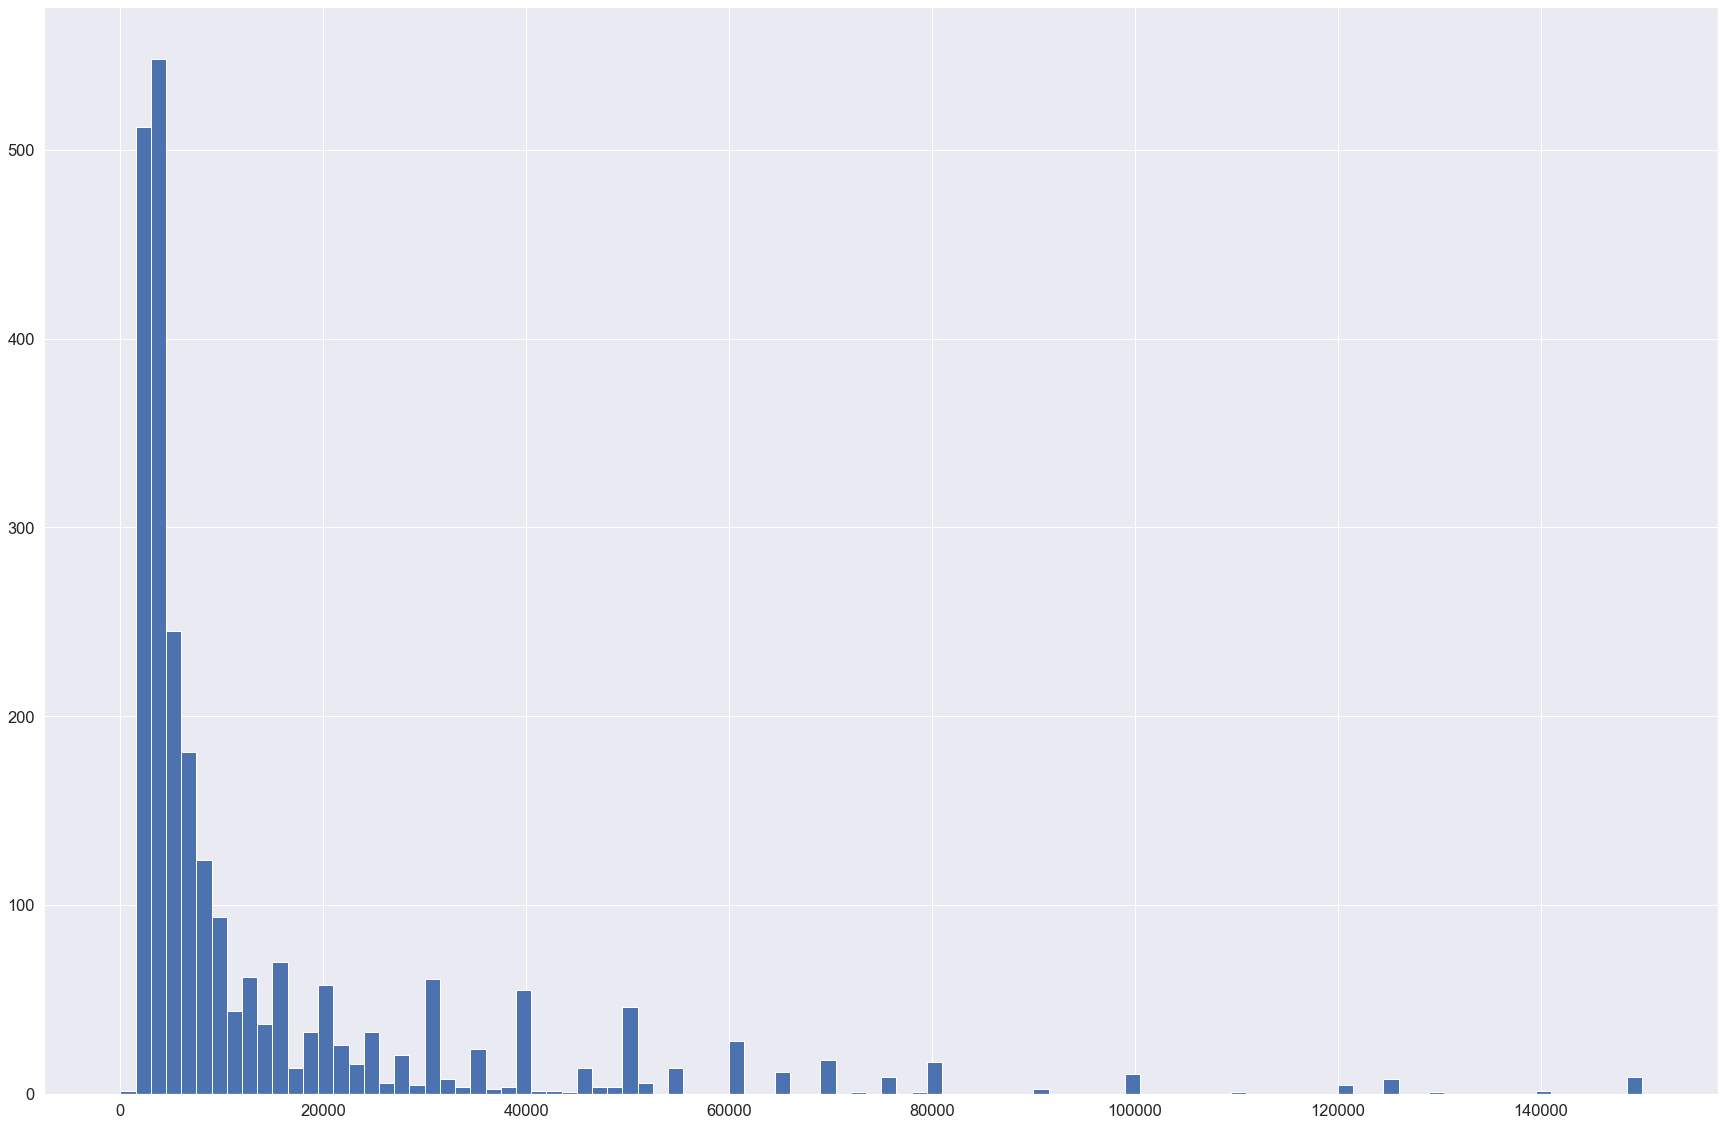

In [80]:
df_fetch['연봉_만원'].hist(bins=100);

C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48393 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 48393 missing from current f

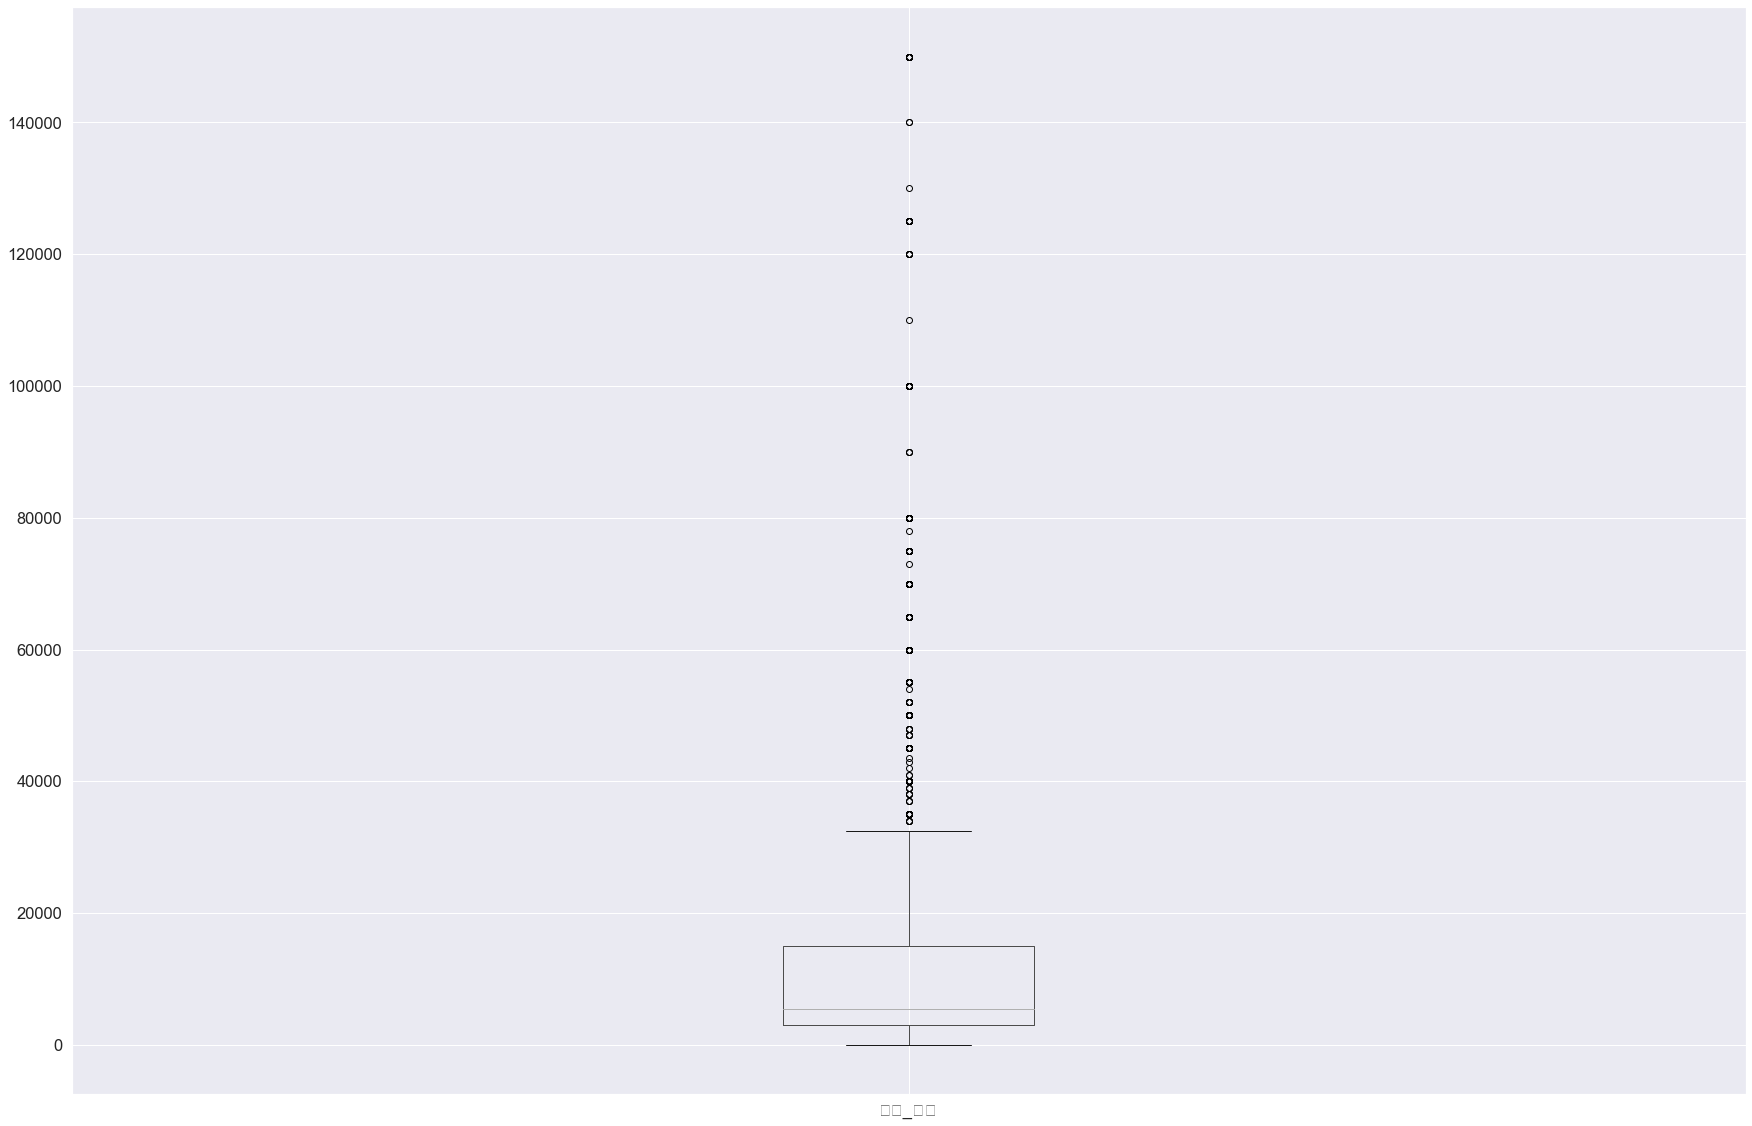

In [81]:
df_fetch.boxplot(column=['연봉_만원']);

In [82]:
import matplotlib.pyplot as plt

def plot_hist_all_columns(df):
    plt.rcParams['figure.figsize']=[30,20]
    fig=plt.figure(1)
    
    for x in range(len(df.columns)):
        ax = fig.add_subplot(6,5,x+1)
        plt.hist(df1[df1.columns[x]], bins=50)
        ax.set_title(df1.columns[x])
    plt.show()

C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49692 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 53580 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51221 missing from current

C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 55192 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54952 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45812 missing from current

C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47492 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45349 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54016 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46301 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51216 missing from current

C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 55141 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 47144 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 47788 missing from current font.
  f

C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 50892 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44208 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 55136 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 47449 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 52509 missing from current font.
  f

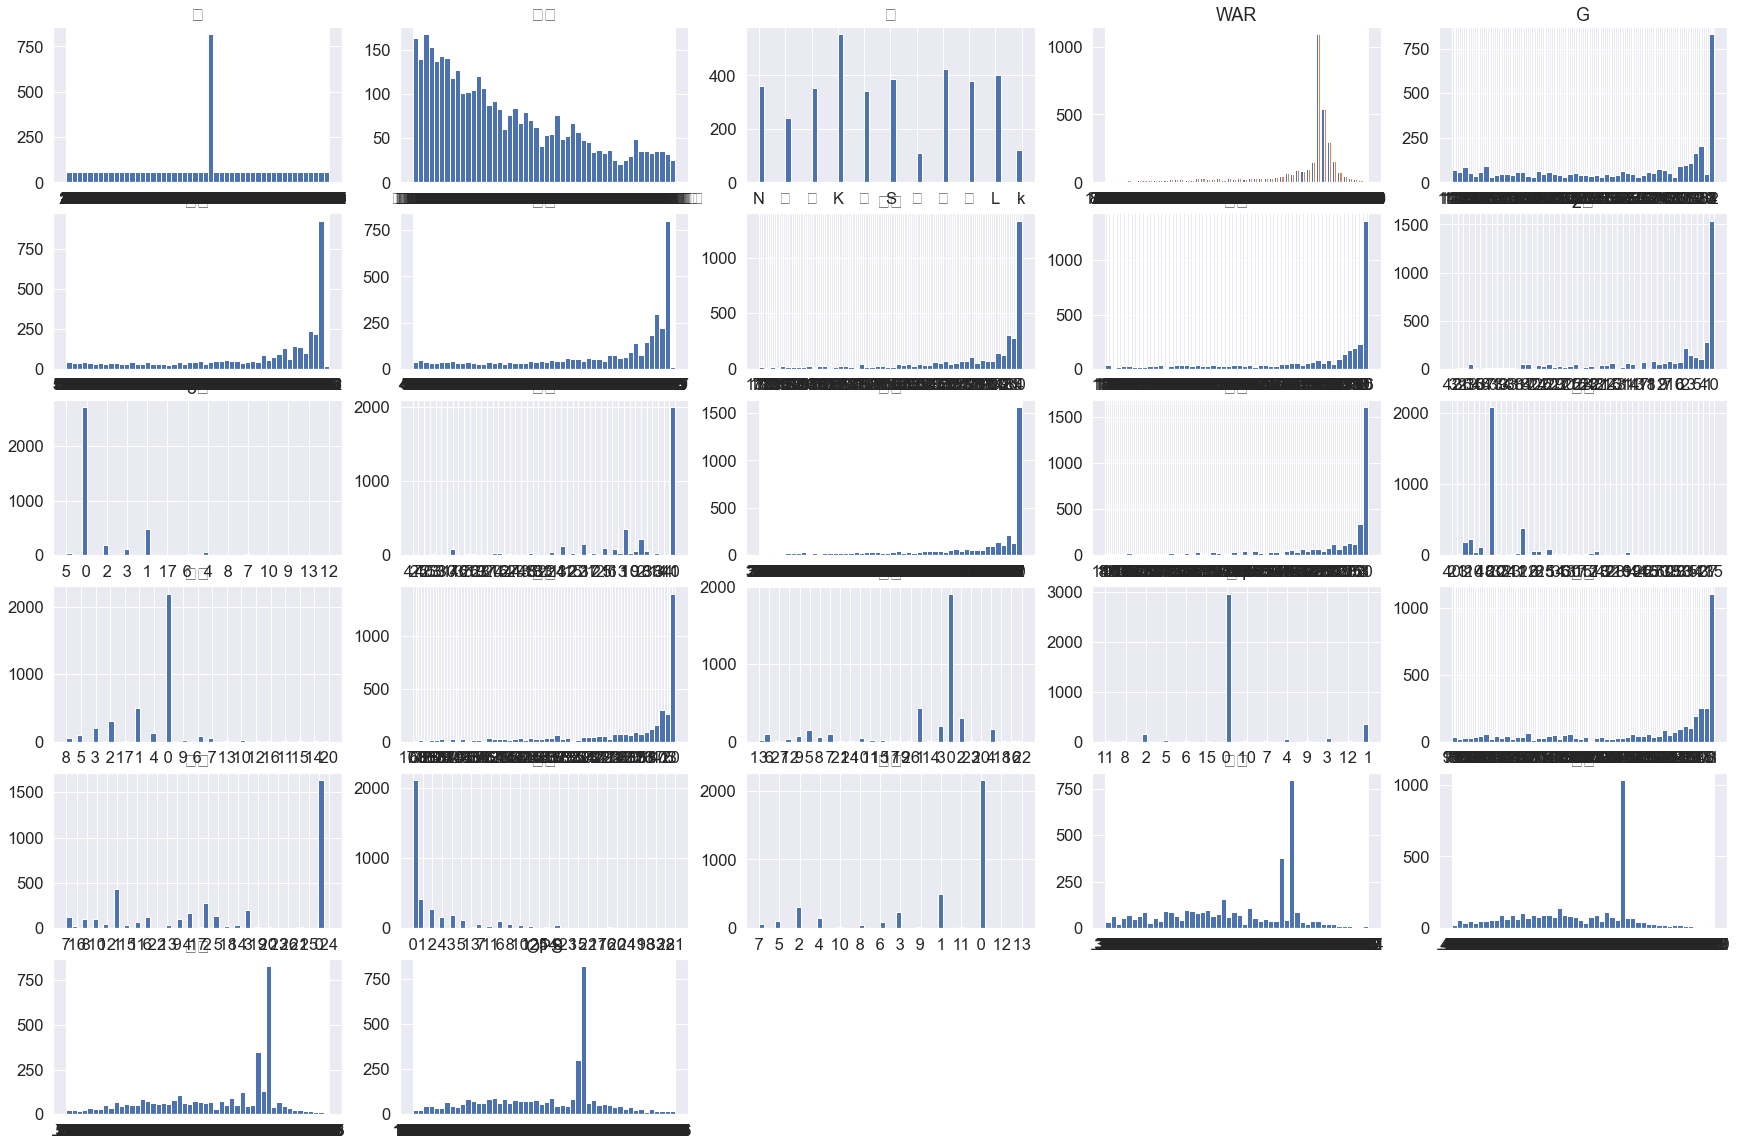

In [83]:
plot_hist_all_columns(df_fetch)

In [42]:
#df_fetch.drop('포지션', axis=1, inplace=True)

####  타겟과 기준모델
- 평가지표 : MSE, MAE, RMSE, R^2

In [84]:
target= '연봉_만원'

#기준모델
df_fetch[target].mean()

14320.406536468712

In [85]:
df_fetch.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2509 entries, 0 to 3211
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   이름      2509 non-null   object
 1   WAR     2509 non-null   object
 2   G       2509 non-null   object
 3   타석      2509 non-null   object
 4   타수      2509 non-null   object
 5   득점      2509 non-null   object
 6   안타      2509 non-null   object
 7   홈런      2509 non-null   object
 8   루타      2509 non-null   object
 9   타점      2509 non-null   object
 10  도루      2509 non-null   object
 11  도실      2509 non-null   object
 12  볼넷      2509 non-null   object
 13  사구      2509 non-null   object
 14  고4      2509 non-null   object
 15  삼진      2509 non-null   object
 16  병살      2509 non-null   object
 17  희타      2509 non-null   object
 18  희비      2509 non-null   object
 19  타율      2509 non-null   object
 20  출루      2509 non-null   object
 21  장타      2509 non-null   int64 
 22  OPS     2509 non-null   

In [86]:
#  df_fetch.T[249]  # 빈칸데이터 확인용

In [87]:
df_fetch= df_fetch[df_fetch != "  "]   # 빈칸 데이터 삭제

In [88]:
df_fetch.dropna(axis=0, inplace =True)
df_fetch

,이름,WAR,G,타석,타수,득점,안타,홈런,루타,타점,...,희타,희비,타율,출루,장타,OPS,wOBA,wRC+,연도,연봉_만원
0,테임즈,10.71,142,595,472,130,180,47,373,140,...,0,7,.381,.498,47,1.288,.530,222.3,15,125000
1,강정호,8.23,124,519,436,77,137,25,244,82,...,1,5,.314,.413,32,.973,.438,179.8,12,18000
2,박석민,7.89,127,549,443,79,138,23,232,91,...,2,5,.312,.433,22,.957,.438,179.9,12,18000
3,박병호,7.76,140,622,528,129,181,53,377,146,...,0,4,.343,.436,36,1.150,.481,181.9,15,70000
4,최형우,7.75,138,618,519,99,195,31,338,144,...,0,7,.376,.464,48,1.116,.480,177.8,16,70000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3207,이홍구,-0.44,37,58,55,4,9,1,12,7,...,0,1,.164,.190,0,.408,.183,-7.9,21,9000
3208,오재원,-0.44,45,79,72,6,12,0,15,5,...,0,1,.167,.228,3,.436,.215,16.6,21,30000
3209,정진호,-0.45,50,167,145,9,33,0,42,15,...,4,2,.228,.301,9,.590,.277,57.4,21,11300
3210,유장혁,-0.74,34,112,98,11,14,1,22,7,...,2,2,.143,.218,5,.443,.212,14.2,21,3200


In [89]:
df_fetch.isnull().sum()

이름       0
WAR      0
G        0
타석       0
타수       0
득점       0
안타       0
홈런       0
루타       0
타점       0
도루       0
도실       0
볼넷       0
사구       0
고4       0
삼진       0
병살       0
희타       0
희비       0
타율       0
출루       0
장타       0
OPS      0
wOBA     0
wRC+     0
연도       0
연봉_만원    0
dtype: int64

In [90]:
numeric_columns = df_fetch.columns[2:]

In [91]:
df_x = df_fetch[numeric_columns].apply(pd.to_numeric)     
# object to numeric

In [92]:
df_y = df_fetch[['이름']]

In [93]:
df_final = pd.concat([df_x,df_y],axis=1)
df_final.reset_index(drop=True, inplace=True)
df_final

,G,타석,타수,득점,안타,홈런,루타,타점,도루,도실,...,희비,타율,출루,장타,OPS,wOBA,wRC+,연도,연봉_만원,이름
0,142,595,472,130,180,47,373,140,40,8,...,7,0.381,0.498,47,1.288,0.530,222.3,15,125000,테임즈
1,124,519,436,77,137,25,244,82,21,5,...,5,0.314,0.413,32,0.973,0.438,179.8,12,18000,강정호
2,127,549,443,79,138,23,232,91,2,3,...,5,0.312,0.433,22,0.957,0.438,179.9,12,18000,박석민
3,140,622,528,129,181,53,377,146,10,3,...,4,0.343,0.436,36,1.150,0.481,181.9,15,70000,박병호
4,138,618,519,99,195,31,338,144,2,2,...,7,0.376,0.464,48,1.116,0.480,177.8,16,70000,최형우
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,37,58,55,4,9,1,12,7,0,0,...,1,0.164,0.190,0,0.408,0.183,-7.9,21,9000,이홍구
2505,45,79,72,6,12,0,15,5,2,0,...,1,0.167,0.228,3,0.436,0.215,16.6,21,30000,오재원
2506,50,167,145,9,33,0,42,15,4,1,...,2,0.228,0.301,9,0.590,0.277,57.4,21,11300,정진호
2507,34,112,98,11,14,1,22,7,2,1,...,2,0.143,0.218,5,0.443,0.212,14.2,21,3200,유장혁


In [94]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error

In [95]:
df_final1 = df_final[df_final.columns.difference(['이름'])]
df_final1

,G,OPS,wOBA,wRC+,고4,도루,도실,득점,루타,병살,...,연봉_만원,장타,출루,타석,타수,타율,타점,홈런,희비,희타
0,142,1.288,0.530,222.3,11,40,8,130,373,7,...,125000,47,0.498,595,472,0.381,140,47,7,0
1,124,0.973,0.438,179.8,8,21,5,77,244,16,...,18000,32,0.413,519,436,0.314,82,25,5,1
2,127,0.957,0.438,179.9,5,2,3,79,232,8,...,18000,22,0.433,549,443,0.312,91,23,5,2
3,140,1.150,0.481,181.9,6,10,3,129,377,10,...,70000,36,0.436,622,528,0.343,146,53,4,0
4,138,1.116,0.480,177.8,8,2,2,99,338,12,...,70000,48,0.464,618,519,0.376,144,31,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,37,0.408,0.183,-7.9,1,0,0,4,12,4,...,9000,0,0.190,58,55,0.164,7,1,1,0
2505,45,0.436,0.215,16.6,0,2,0,6,15,3,...,30000,3,0.228,79,72,0.167,5,0,1,0
2506,50,0.590,0.277,57.4,1,4,1,9,42,5,...,11300,9,0.301,167,145,0.228,15,0,2,4
2507,34,0.443,0.212,14.2,0,2,1,11,22,2,...,3200,5,0.218,112,98,0.143,7,1,2,2


In [96]:
# 데이터 분리
train, test =train_test_split(df_final1, test_size=0.2, train_size=0.8,
                            random_state=2 )

train.shape, test.shape

((2007, 25), (502, 25))

In [97]:
features = train.drop(columns=[target]).columns 

# 훈련/테스트 데이터를 특성과 타겟으로 분리
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [98]:
X_train

,G,OPS,wOBA,wRC+,고4,도루,도실,득점,루타,병살,...,연도,장타,출루,타석,타수,타율,타점,홈런,희비,희타
1856,5,0.222,0.106,-61.1,0,0,0,0,1,1,...,13,0,0.111,9,9,0.111,0,0,0,0
1543,2,0.000,0.000,-134.8,0,0,0,0,0,0,...,14,0,0.000,2,2,0.000,0,0,0,0
652,92,0.704,0.332,105.7,0,3,0,23,74,3,...,12,11,0.330,232,198,0.222,23,6,0,2
1796,4,0.250,0.120,-48.1,0,0,0,0,1,0,...,21,0,0.125,8,8,0.125,0,0,0,0
2159,96,0.616,0.291,64.8,0,7,5,26,76,7,...,20,6,0.311,278,249,0.245,34,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,81,0.719,0.330,104.3,1,2,2,19,92,4,...,12,19,0.324,256,233,0.283,27,2,4,3
2408,60,0.722,0.333,92.4,1,0,0,11,34,2,...,21,3,0.326,95,86,0.256,14,3,0,0
1099,25,0.657,0.331,105.0,0,0,0,5,8,0,...,12,1,0.371,35,28,0.250,1,0,1,0
2347,75,0.741,0.342,107.7,1,3,1,32,91,9,...,21,11,0.329,256,221,0.226,34,10,0,1


In [99]:
y_train

1856     2400
1543     3600
652      8500
1796     4500
2159    19000
        ...  
674      5000
2408     5000
1099     3200
2347    20000
1608     3400
Name: 연봉_만원, Length: 2007, dtype: int64

# 머신러닝 적용, 회귀모델

In [100]:
from sklearn.model_selection import cross_val_score

pipe_linear = make_pipeline(
        RobustScaler(),           # outlier 영향 최소화
        LinearRegression()        
) 
 
basic_scores = cross_val_score(pipe_linear, X_train, y_train) # default cv =5
cv3_scores = cross_val_score(pipe_linear, X_train, y_train, cv = 3)

print('기본 교차 검증 점수 : ', basic_scores)
print('3-겹 교차 검증 점수 : ', cv3_scores)

기본 교차 검증 점수 :  [0.48984582 0.4613576  0.38261035 0.40312677 0.20636936]
3-겹 교차 검증 점수 :  [0.48926444 0.41477094 0.29732321]


In [101]:
pipe_linear.fit(X_train, y_train);
print('훈련 정확도: ', pipe_linear.score(X_train, y_train))

훈련 정확도:  0.4431061512786836


In [102]:
print('테스트세트 정확도', pipe_linear.score(X_test, y_test))

테스트세트 정확도 0.4665011645710351


In [103]:
print(pipe_linear.named_steps['linearregression'].coef_)

[-5.68374469e+03  7.31199782e+03 -2.78821300e+03 -7.70085543e+03
  1.27421990e+03  1.50648600e+02 -1.14675966e+03  2.76111855e+03
 -1.50473089e+05  5.23175342e+03 -5.22894653e+04 -9.34006488e+03
 -8.17480116e+03  1.05361047e+05  2.17682730e+03  1.94844733e+04
  4.18053691e+03  6.64847178e+05 -5.68474613e+05 -7.79556236e+02
 -1.91496502e+03  2.76745811e+04 -4.65072744e+03 -8.99499673e+03]


In [104]:
df_final1.columns

Index(['G', 'OPS', 'wOBA', 'wRC+', '고4', '도루', '도실', '득점', '루타', '병살', '볼넷',
       '사구', '삼진', '안타', '연도', '연봉_만원', '장타', '출루', '타석', '타수', '타율', '타점',
       '홈런', '희비', '희타'],
      dtype='object')

In [105]:
import math

y_pred = pipe_linear.predict(X_train)
print(mean_squared_error(y_train, y_pred)**0.5)
y_pred_t = pipe_linear.predict(X_test)
print(mean_squared_error(y_test, y_pred_t)**0.5)

15798.80912683586
14771.198892885988


In [106]:
aa = pipe_linear.predict(df_fetch[['G', 'OPS', 'wOBA', 'wRC+', '고4', '도루', '도실', '득점', '루타', '병살', '볼넷',
       '사구', '삼진', '안타', '연도', '장타', '출루', '타석', '타수', '타율', '타점',
       '홈런', '희비', '희타']])

In [107]:
df_fetch_1 = df_fetch.copy()

In [108]:
df_fetch_1['예측연봉'] = pd.Series(aa)

In [109]:
df_fetch_1 = df_fetch_1[['이름', '연봉_만원', '예측연봉']]

In [110]:
df_fetch_1.head(10)

,이름,연봉_만원,예측연봉
0,테임즈,125000,83863.551377
1,강정호,18000,59814.558542
2,박석민,18000,45202.667029
3,박병호,70000,73254.524497
4,최형우,70000,71785.456636
5,최형우,18500,66658.397077
6,서건창,9300,14433.795329
7,로하스,80000,69851.282901
8,김재환,20000,67179.581126
9,최정,28000,45362.994304


C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46301 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Yong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51216 missing from current

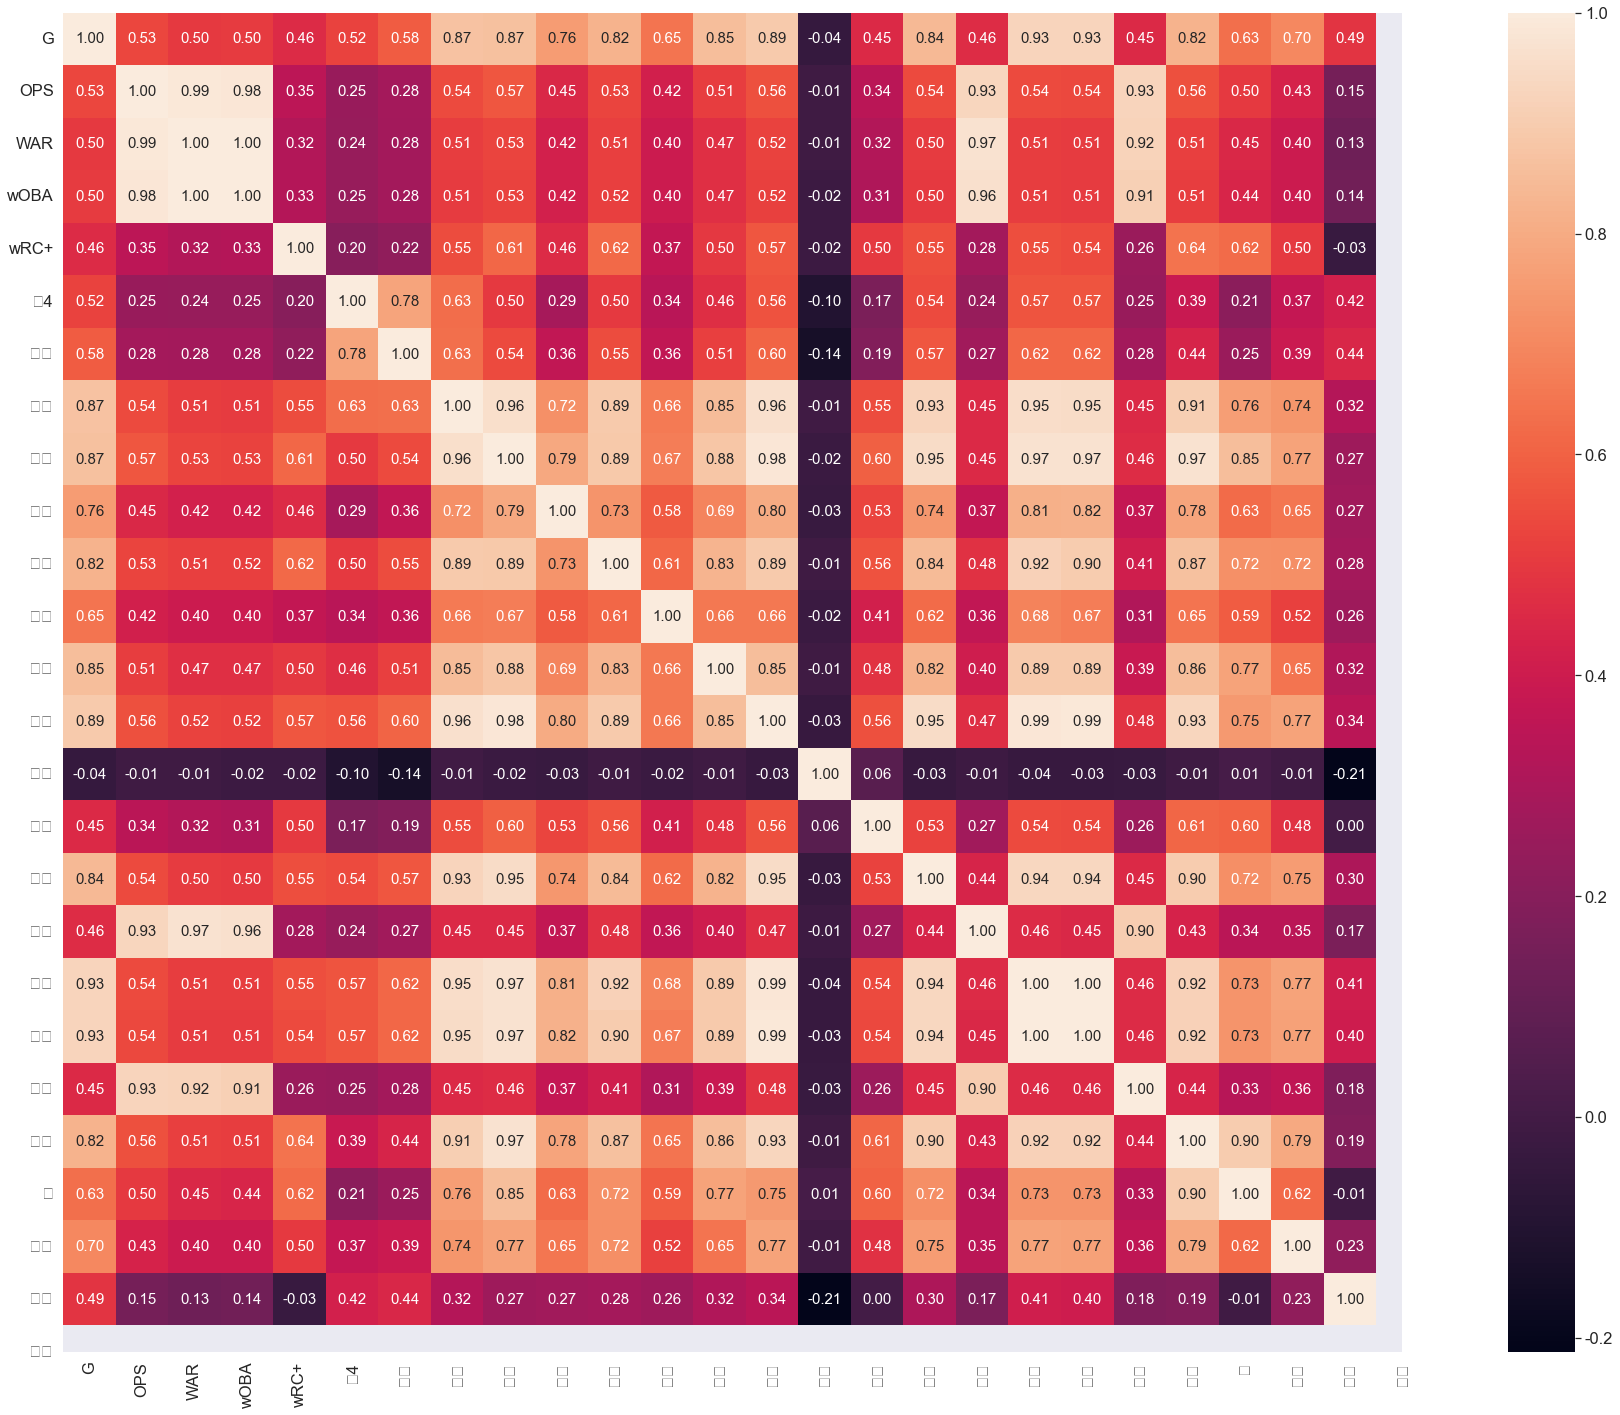

In [111]:
import seaborn as sns

sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

corr = df_final1.corr()
a = ['G', 'OPS', 'WAR', 'wOBA', 'wRC+', '고4', '도루', '도실', '득점', '루타', '병살',
       '볼넷', '사구', '삼진', '안타', '연도', '장타', '출루', '타석', '타수', '타율',
       '타점', '팀', '홈런', '희비', '희타']
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size':15},
                yticklabels=a,
                xticklabels=a)
plt.tight_layout()
plt.show()

In [112]:
# vif를 이용한 변수선택(다중공선성 제거)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()

In [113]:
vif['VIF Factor'] = [variance_inflation_factor(df_final1.values,i) for i in range(df_final1.shape[1])]
vif['feature'] = df_final1.columns
vif.round(1)

,VIF Factor,feature
0,31.7,G
1,827.8,OPS
2,1526.4,wOBA
3,21.3,wRC+
4,2.5,고4
5,5.0,도루
6,4.6,도실
7,53.4,득점
8,12641.4,루타
9,7.4,병살


#### 적절한 feature들로 다시 학습하기

In [114]:
# 홈런, 타율, 병살, 삼진, 타수
X_vif = df_final1[['타수', '타율', '홈런', '병살', '삼진']]
Y_vif = df_final1[target]
X_train_vif, X_test_vif, y_train_vif, y_test_vif = train_test_split(X_vif, Y_vif, test_size=0.2, random_state=2)

In [115]:
X_train_vif

,타수,타율,홈런,병살,삼진
1856,9,0.111,0,1,2
1543,2,0.000,0,0,0
652,198,0.222,6,3,66
1796,8,0.125,0,0,2
2159,249,0.245,3,7,30
...,...,...,...,...,...
674,233,0.283,2,4,34
2408,86,0.256,3,2,20
1099,28,0.250,0,0,11
2347,221,0.226,10,9,59


In [116]:
lr = LinearRegression()
model = lr.fit(X_train_vif, y_train_vif)

In [117]:
print(model.score(X_train_vif,y_train_vif))
print(model.score(X_test_vif, y_test_vif))

0.4045153808890646
0.43836350381214884


### 모델 저장(pkl)

In [196]:
model_pkl = LinearRegression()
model_pkl.fit(X_train_vif, y_train_vif)

LinearRegression()

In [197]:
X_train_vif

,타수,타율,홈런,병살,삼진
1856,9,0.111,0,1,2
1543,2,0.000,0,0,0
652,198,0.222,6,3,66
1796,8,0.125,0,0,2
2159,249,0.245,3,7,30
...,...,...,...,...,...
674,233,0.283,2,4,34
2408,86,0.256,3,2,20
1099,28,0.250,0,0,11
2347,221,0.226,10,9,59


In [198]:
joblib.dump(model_pkl, 'C:/Users/Yong/코드스테이츠 AI/Section Project/section3/flask_app/model/model.pkl')
# # Saving model to disk
# pickle.dump(regressor, open('model.pkl','wb'))

['C:/Users/Yong/코드스테이츠 AI/Section Project/section3/flask_app/model/model.pkl']

In [187]:
data = {'타수':['150'], '타율':['0.305'], '홈런':['30'], '병살':['5'], '삼진':['10']}
df = pd.DataFrame(data)

predict = model_pkl.predict(df)[0].round(3)

In [188]:
predict

54772.696

In [199]:
model_1 = joblib.load('C:/Users/Yong/코드스테이츠 AI/Section Project/section3/flask_app/model/model.pkl')
model_1.predict(df)

C:\Users\Yong\anaconda3\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator LinearRegression from version 1.0 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


array([54772.69626852])

In [228]:
import os
path = os.getcwd()
path


'C:\\Users\\Yong\\코드스테이츠 AI\\Section Project\\section3\\flask_app\\model'

In [230]:
df_final1

,G,OPS,wOBA,wRC+,고4,도루,도실,득점,루타,병살,...,연봉_만원,장타,출루,타석,타수,타율,타점,홈런,희비,희타
0,142,1.288,0.530,222.3,11,40,8,130,373,7,...,125000,47,0.498,595,472,0.381,140,47,7,0
1,124,0.973,0.438,179.8,8,21,5,77,244,16,...,18000,32,0.413,519,436,0.314,82,25,5,1
2,127,0.957,0.438,179.9,5,2,3,79,232,8,...,18000,22,0.433,549,443,0.312,91,23,5,2
3,140,1.150,0.481,181.9,6,10,3,129,377,10,...,70000,36,0.436,622,528,0.343,146,53,4,0
4,138,1.116,0.480,177.8,8,2,2,99,338,12,...,70000,48,0.464,618,519,0.376,144,31,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,37,0.408,0.183,-7.9,1,0,0,4,12,4,...,9000,0,0.190,58,55,0.164,7,1,1,0
2505,45,0.436,0.215,16.6,0,2,0,6,15,3,...,30000,3,0.228,79,72,0.167,5,0,1,0
2506,50,0.590,0.277,57.4,1,4,1,9,42,5,...,11300,9,0.301,167,145,0.228,15,0,2,4
2507,34,0.443,0.212,14.2,0,2,1,11,22,2,...,3200,5,0.218,112,98,0.143,7,1,2,2


In [236]:
# dataframe to csv
df_final1.to_csv('C:\\Users\\Yong\\코드스테이츠 AI\\Section Project\\section3\\baseball.csv',sep=',',index=False, encoding="utf-8-sig")